# Drawing Molecules

The associated post can be found [here]()

## Set Up Data

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import MolsToGridImage

In [2]:
data = {'name': ['Acetylsalicylic Acid', 'Ibuprofen'],
        'smiles': ['O=C(C)Oc1ccccc1C(=O)O', 'CC(C)Cc1ccc(cc1)[C@@H](C)C(=O)O']}
df = pd.DataFrame(data=data)
df

,name,smiles
0,Acetylsalicylic Acid,O=C(C)Oc1ccccc1C(=O)O
1,Ibuprofen,CC(C)Cc1ccc(cc1)[C@@H](C)C(=O)O


## Drawing the Molecule

Because I loaded up my dataset as a DataFrame, I will need to "slice" the table into a format for drawing. In this case, the important information is the smiles string. My brain works in Tables, but if you prefer, you can write out the smiles string directly for drawing the molecule, i.e. aspirin = 'O=C(C)Oc1ccccc1C(=O)O'

Next, the smiles string will need to be converted an rdkit molecule object. This is done using [MolFromSmiles()](https://www.rdkit.org/docs/GettingStartedInPython.html#reading-single-molecules) function. 

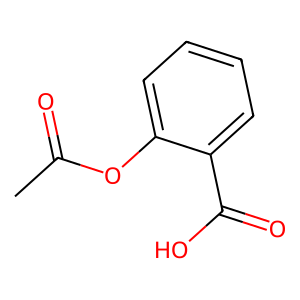

In [3]:
aspirin = df.iloc[0, 1]
mol = Chem.MolFromSmiles(aspirin)
img = Draw.MolToImage(mol)
img

**NOTE** If you print out the type of the img object, you will see that it is a PIL object. As such, it can be manipulated using the [PIL Image module](https://pillow.readthedocs.io/en/stable/reference/Image.html). I do not have much experience with that as I am normally quite happy with the default outcomes. 

````python
print(type(image))
````


Another cool feature is that you can add a legend to the individual images. In this case we can test it out for aspirin. 

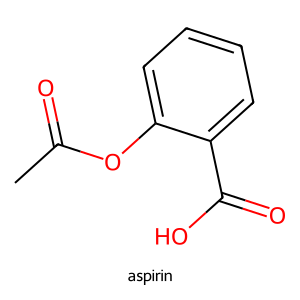

In [4]:
img = Draw.MolToImage(mol, legend='aspirin')
img

Drawing a single molecule is all well and good, but what if we wanted to draw multiple molecules? The good news is that RDKit allows this with a [MolsToGridImage()](https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html#rdkit.Chem.Draw.MolsToGridImage) function. 

To use this, pass a list of RDKit objects into function for drawing.

## Drawing Molecules in a Grid

Those examples above are for single compounds. It is a great tool and, when we grasp more complex script, we can quickly draw multiple molecules by looping through a list of smiles strings. That is great, but depending on our aims, individual drawings might not cut it. Enter a neat tool by RDKit - drawing molecules in a grid! 

It is as simple as drawing the individual molecules. All that is needed is a list of smiles strings. Like the previous example, more extra information can be added to the image. Here I kept it simple and passed a list of molecule names.  

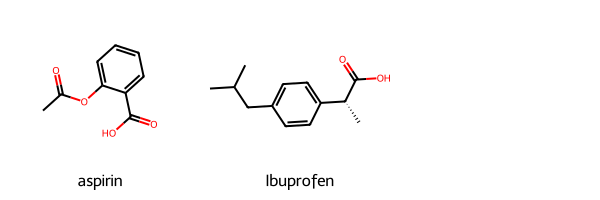

In [5]:
mols = [Chem.MolFromSmiles(mol) for mol in df['smiles']]
MolsToGridImage(mols, legends=['aspirin', 'Ibuprofen'])

## Conclusion

With RDKit, there are some easy to use tools baked in. You just need to know the right ingredients! 